
## Volume 2: OpenGym



<Name\>
<Class\>
<Date\>





**Note:** Some IPython notebook platforms (such as Google Colab) do not currently support rendering OpenAI environments. In order to properly render the OpenGym environments in this lab, you may need to run the Jupyter Notebook locally (for example, run it in VSCode or from the command line).

In [3]:
from gym import envs
print(envs.registry.all())

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)


In [2]:
import gym
import numpy as np
from IPython.display import clear_output
import random
from matplotlib import pyplot as plt

**Problem 1**

*   Implement `random_blackjack()`.
*   Run the game 500 times and output the percentage of games that are wins.



In [244]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    Iwon = 0
    for _ in range(n):
        env = gym.make('Blackjack-v1') #initialize environment
        observation = env.reset()      #start running model
        done = False
        while not done:
            (observation, reward, done, info) = env.step(env.action_space.sample())
            #observation is the results of the iteration
            #reward indicates win (1) loss (-1)
            #done indicates doneness
            #info is generally useless
        if reward == 1:
            Iwon += reward
    return Iwon/n

In [245]:
random_blackjack(500)

0.256

**Problem 2**

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [97]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    
    winrate = 0
    for _ in range(10000):
        env = gym.make('Blackjack-v1') #initialize environment
        obs = env.reset()              #reset environment
        done = False
        while not done:
            seed = int(obs[0]<=n)      #keep going if less than hand max
            obs, reward, done, info = env.step(seed)
        if reward == 1:
            winrate += 1
            
    return winrate/10000

In [99]:
winrate = {}
for hand in range(1,22):
    winrate[hand] = blackjack(hand)

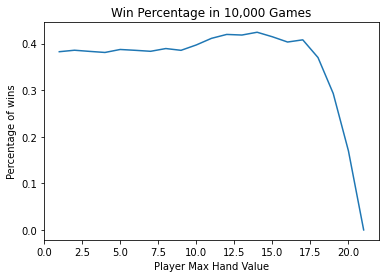

In [103]:
plt.plot(winrate.keys(),winrate.values())
plt.title('Win Percentage in 10,000 Games')
plt.ylabel('Percentage of wins')
plt.xlabel('Player Max Hand Value')
plt.show()

In [116]:
np.max(list(winrate.values()))

0.4243

A max hand of 14 wins 42.43%

**Problem 3**

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [162]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v0 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    steps = 0
    env = gym.make('CartPole-v1')
    obs = env.reset()
    done = False
    while not done:
        if obs[3] < 0: #top of pole moving left
            (obs, reward, done, info) = env.step(0) #move cart left
            
        else:
            (obs, reward, done, info) = env.step(1)
        steps +=1
    return(steps)

In [159]:
walks = []
for _ in range(100):
    walks.append(cartpole())

In [160]:
np.mean(walks)

204.08

**Problem 4**

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [171]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    steps = 0
    env = gym.make('MountainCar-v0')
    obs = env.reset()
    done = False
    while not done:
        if obs[1] < 0: #if car moving left
            (obs, reward, done, info) = env.step(0) #keep moving left
            
        else:
            (obs, reward, done, info) = env.step(2)
        steps +=1
    return(steps)

In [173]:
walks = []
for _ in range(100):
    walks.append(car())

In [174]:
np.mean(walks)

119.43

**Helper Function for Problem 5**

In [175]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n,env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table


**Problem 5**

* Render the "`Taxi-v3`" environment, act randomly until it terminates, and calculate the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and calculate the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [194]:
def random_taxi():
    total_reward = 0
    env = gym.make('Taxi-v3')
    obs = env.reset()
    done = False
    while not done: #random movements
        (obs, reward, done, info) = env.step(env.action_space.sample())
        total_reward += reward 
    return total_reward

In [195]:
qtip = find_qvalues('Taxi-v3', alpha = .1, gamma = .6, epsilon = .1)

Episode: 100000
Training finished.


In [196]:
def use_table(qtip):
    total_reward = 0
    env = gym.make('Taxi-v3')
    obs = env.reset()
    done = False
    while not done: #movements finely attuned to the genius of qtip
        obs, reward, done, info = env.step(np.argmax(qtip[obs]))
        total_reward += reward 
    return total_reward

In [242]:
def taxi(qtip):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 10000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 10000 runs
    """
    random_reward = 0
    table_reward = 0
    for i in range(1,10001):
        random_reward += random_taxi()
        table_reward += use_table(qtip)
    random_reward = random_reward/10000 #take average
    table_reward = table_reward/10000
    
    return random_reward, table_reward

In [243]:
taxi(qtip)

(-769.1698, 7.906)

In [238]:
env = gym.make('Taxi-v3')
try:
    env.reset()
    done = False
    while not done:
        env.render()
        obs, reward, done, info = env.step(np.argmax(qtip[obs]))
        if done:
            break
finally:
    env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)


In [239]:
env = gym.make('Taxi-v3')
try:
    env.reset()
    done = False
    while not done:
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        if done:
            break
finally:
    env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:

In [235]:
500 % 100

0

In [247]:
env = gym.make('MountainCar-v0')
try:
    env.reset()
    done = False
    while not done:
        env.render()
        obs, reward, done, info = env.step(env.action_space.sample())
        if done:
            break
finally:
    env.close()